# Twitter Sentimental Analysis Dataset

## Overview

The Twitter Sentimental Analysis dataset is designed for performing sentiment analysis on tweets. It contains various tweets labeled with sentiment categories, allowing researchers and practitioners to develop models that can classify the emotional tone of social media text.


# Dataset Columns Explanation

This dataset consists of the following columns:

- **id**: A unique identifier for each tweet or data entry. It helps in tracking and referencing individual records.

- **entity**: The entity or subject related to the tweet, which could include keywords, hashtags, or topics of discussion.

- **target**: The sentiment target or the specific aspect of the entity that the sentiment is directed towards (e.g., a product, service, or individual).

- **text**: The actual content of the tweet, containing the user's message and sentiment. This is the primary text that will be analyzed for sentiment analysis.


## Dataset Source

The dataset can be loaded using the following code:

```python
from datasets import load_dataset

ds = load_dataset("sathya0901/twitter_sentimental_analysis")```




In [34]:
!pip install datasets
!pip install gradio
!pip install seaborn

In [35]:
# Import necessary libraries
import pandas as pd  # For handling data in tabular form
import matplotlib.pyplot as plt  # For creating plots and visualizations
import seaborn as sns  # For enhanced visualizations
from datasets import load_dataset  # To load datasets easily
from sklearn.model_selection import train_test_split  # To split data into training and test sets
from sklearn.feature_extraction.text import CountVectorizer  # To convert text data into numerical format
from sklearn.naive_bayes import MultinomialNB  # A machine learning model for classification
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # To evaluate model performance
import gradio as gr  # For creating a user interface to interact with the model

In [36]:
# Step 1: Load the dataset
# Load the Twitter Sentimental Analysis dataset from Hugging Face
ds = load_dataset("sathya0901/twitter_sentimental_analysis")
df = pd.DataFrame(ds['train'])  # Convert the dataset into a DataFrame for easier handling

# Display the columns and basic information
print(df.columns)  # Show the names of the columns in the dataset
print(df.info())  # Display information about the dataset (e.g., data types, number of entries)
print(df.head())  # Show the first few rows of the dataset

Index(['id', 'entity', 'target', 'text'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      74682 non-null  int64 
 1   entity  74682 non-null  object
 2   target  74682 non-null  object
 3   text    73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
None
     id       entity    target  \
0  2401   Borderland  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                text  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


In [43]:
df.columns

Index(['id', 'entity', 'target', 'text'], dtype='object')

In [37]:
# Step 2: Handle missing values in the text column
# Check how many tweets have missing text
missing_values = df['text'].isnull().sum()
print(f'Missing values in text column: {missing_values}')

# Remove rows where the text is missing
df = df.dropna(subset=['text'])


Missing values in text column: 686


id        0
entity    0
target    0
text      0
dtype: int64
target
Negative      22358
Positive      20655
Neutral       18108
Irrelevant    12875
Name: count, dtype: int64


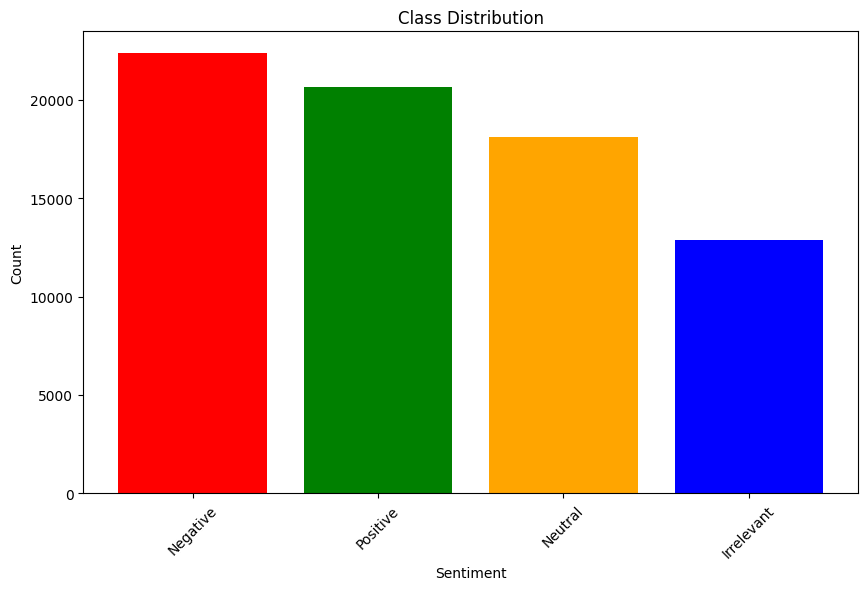

In [38]:
# Step 3: Exploratory Data Analysis (EDA)
# Check for any remaining missing values
print(df.isnull().sum())

# Count how many tweets belong to each sentiment category
sentiment_counts = df['target'].value_counts()
print(sentiment_counts)  # Display the count of each sentiment

# Create a bar plot to visualize the distribution of sentiments
plt.figure(figsize=(10, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['red', 'green', 'orange', 'blue'])
plt.title('Class Distribution')  # Title of the plot
plt.xlabel('Sentiment')  # Label for the x-axis
plt.ylabel('Count')  # Label for the y-axis
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()  # Display the plot

In [39]:
# Step 4: Prepare the Data for Training
X = df['text']  # Features: the text of the tweets
y = df['target']  # Labels: the corresponding sentiment of each tweet

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Convert text data into numerical format using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)  # Fit and transform the training data
X_test_vectorized = vectorizer.transform(X_test)  # Transform the test data

In [40]:
# Step 5: Train the Naive Bayes Model
model = MultinomialNB()  # Initialize the Naive Bayes model
model.fit(X_train_vectorized, y_train)  # Train the model on the vectorized training data


MultinomialNB()

Accuracy: 0.7573648648648649
              precision    recall  f1-score   support

  Irrelevant       0.84      0.64      0.73      2575
    Negative       0.71      0.86      0.78      4472
     Neutral       0.84      0.64      0.73      3622
    Positive       0.73      0.82      0.77      4131

    accuracy                           0.76     14800
   macro avg       0.78      0.74      0.75     14800
weighted avg       0.77      0.76      0.75     14800



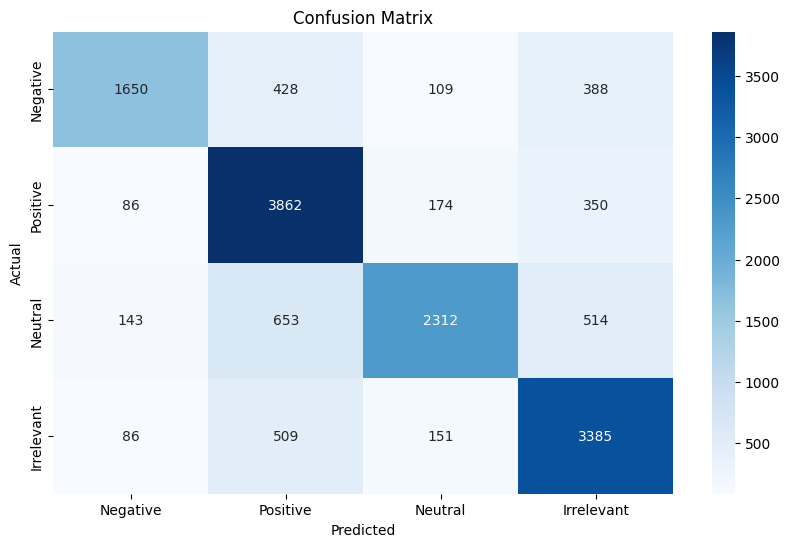

In [41]:
# Step 6: Make Predictions and Evaluate the Model
y_pred = model.predict(X_test_vectorized)  # Predict sentiments for the test data

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
print(f'Accuracy: {accuracy}')  # Display accuracy
print(classification_report(y_test, y_pred))  # Show detailed classification report

# Plot confusion matrix to visualize prediction results
conf_matrix = confusion_matrix(y_test, y_pred)  # Generate the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=sentiment_counts.index,
            yticklabels=sentiment_counts.index)
plt.title('Confusion Matrix')  # Title of the plot
plt.xlabel('Predicted')  # Label for the x-axis
plt.ylabel('Actual')  # Label for the y-axis
plt.show()  # Display the plot


In [42]:

# Step 7: Deploy the Model with Gradio
# Define a function to predict the sentiment of a given tweet
def predict_sentiment(text):
    text_vectorized = vectorizer.transform([text])  # Convert the input text to numerical format
    prediction = model.predict(text_vectorized)  # Predict the sentiment
    return prediction[0]  # Return the predicted sentiment

# Create a Gradio interface for the model
iface = gr.Interface(fn=predict_sentiment,
                     inputs="text",  # Input type is text
                     outputs="text",  # Output type is text
                     title="Twitter Sentiment Analysis",  # Title of the interface
                     description="Enter a tweet to get the sentiment prediction (Negative/Positive/Neutral/Irrelevant).")  # Description of the interface

# Launch the interface
iface.launch()  # Start the Gradio web app to allow user interaction

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://9273c922a7304893f1.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [64]:
# prompt: "I need you to provide the unseen data that has been split, as I would like to check the results. Please include the target values as well; this is likely the X_test data. Adjust it accordingly before sending it over.show all text"

unseen_data = pd.DataFrame({'text': X_test, 'target': y_test})
print(unseen_data)


                                                    text      target
24126  it took me way too fucking long to swap playli...    Negative
60101                                         Real Real.  Irrelevant
52566  Just finished the entire story line of Red Dea...    Positive
11166  Another perfectly splendid day to be a Gears f...  Irrelevant
11831  i honestly think @NBA2K doesnt understand the ...    Negative
...                                                  ...         ...
31845  I need a healslut to duo ranked with that leag...     Neutral
25657  "Attention: this ancestor did not kill any pet...     Neutral
72699  any updates on the new Nvidia driver? do i mak...    Negative
2732                The best and the game is not out yet     Neutral
16911                                   Pretty standard.    Positive

[14800 rows x 2 columns]


In [65]:
unseen_data.value_counts()


,,count
text,target,
,Neutral,13
"At the same time, despite the fact that there are currently some 100 million people living below the poverty line, most of them do not have access to health services and do not have access to health care, while most of them do not have access to health care.",Neutral,13
Wow,Positive,13
It is not the first time that the EU Commission has taken such a step.,Neutral,12
,Negative,12
...,...,...
Good night folks! Thank you for a great evening full of dungeon runs!,Neutral,1
"Good on Sony. As much as I want to see the brand new PS5, what'd s else going around on inside right now is so much more important.",Positive,1
"Good on them. This stuff all based on earnings from last quarter. Let's see how can they do with the next, with the hiccup in supply chains coming.",Irrelevant,1
